# Ch 2: Single-Table Queries


## Elements of the SELECT Statement

### T-SQL Syntax Order
1. SELECT
2. FROM
3. WHERE
4. GROUP BY
5. HAVING
6. ORDER BY

### T-SQL Logical Processing Order
1. FROM
2. WHERE
3. GROUP BY
4. HAVING
5. SELECT
6. ORDER BY

>Clause: Syntactical component of a query (Ex: In the WHERE clause, you specify a predicate)

>Phase: Logical manipulation taking place as part of a query (Ex: The WHERE phase returns rows for which the predicate evaluates to TRUE)

## The FROM Clause

- Specify table names and table operators (if needed)
- Regular identifiers (table and column names) that comply with formatting rules do not need to be delimited
- Irregular identifies must be surrounded by " " or [ ]
    - OrderDetails -- regular
    - "Order Details" -- irregular 
    - [Order Details] -- irregular
- To return all rows from a table with no special manipulation, all you need is a query with a FROM clause with the specified table, and a SELECT clause with the specific attributes you want to return.

In [2]:
USE TSQLV4;

SELECT TOP 5
    orderid, 
    custid, 
    empid, 
    orderdate, 
    freight
FROM Sales.Orders;

(5 rows affected)

Total execution time: 00:00:00.010

orderid,custid,empid,orderdate,freight
10248,85,5,2014-07-04,32.38
10249,79,6,2014-07-05,11.61
10250,34,4,2014-07-08,65.83
10251,84,3,2014-07-08,41.34
10252,76,4,2014-07-09,51.30


# The WHERE Clause

- Predicates or logical expressions are specified in the WHERE clause
- Rows for which the logical expression evaluates to TRUE are returned, while FALSE and UNKOWN are discarded
- Filtering queries reduces network traffic created by returning all rows

In [3]:
USE TSQLV4;

SELECT TOP 5
    orderid, 
    custid, 
    empid, 
    orderdate, 
    freight 
FROM Sales.Orders
WHERE custid = 71;

(5 rows affected)

Total execution time: 00:00:00.029

orderid,custid,empid,orderdate,freight
10324,71,9,2014-10-08,214.27
10393,71,1,2014-12-25,126.56
10398,71,2,2014-12-30,89.16
10440,71,4,2015-02-10,86.53
10452,71,8,2015-02-20,140.26


# The GROUP BY Clause

- Arranges rows returned by the previous logical processing phases into groups, determined by elements specified in the clause
- All phases subsequent to the GROUP BY phase (including HAVING, SELECT and ORDER BY) must operate on groups
- Each group is represented by a single row (scalar) in the final result
- Elements that are not in the GROUP BY clause must be inputted as aggregate functions in the SELECT statement
- Note that all aggregate functions except for COUNT(*) ignore NULLs

In [4]:
USE TSQLV4;

SELECT TOP 5
  empid, 
  YEAR(orderdate) AS orderyear, 
  SUM(freight) AS totalfreight, 
  COUNT(*) AS numorders 
FROM Sales.Orders 
WHERE custid = 71 
GROUP BY empid, YEAR(orderdate);

(5 rows affected)

Total execution time: 00:00:00.020

empid,orderyear,totalfreight,numorders
1,2014,126.56,1
2,2014,89.16,1
9,2014,214.27,1
1,2015,711.13,2
2,2015,352.69,1


# The HAVING Clause

- Group specific filter that filters elements in the GROUP BY clause
- Only groups for which the HAVING predicates evaluate to TRUE are returned, while FALSE and UNKNOWN are discarded
- Because the HAVING clause is processed after the GROUP BY clause, you can refer to aggregate functions in the logical expression

In [5]:
USE TSQLV4;

SELECT TOP 5
    empid, 
    YEAR(orderdate) AS orderyear 
FROM Sales.Orders 
WHERE custid = 71 
GROUP BY empid, YEAR(orderdate) 
HAVING COUNT(*) > 1;
-- Returns employees who sold more than one order to customer 71, grouped by employee and year.

(5 rows affected)

Total execution time: 00:00:00.023

empid,orderyear
1,2015
3,2015
5,2015
6,2015
8,2015


# The SELECT Clause

- The SELECT clause is where attributes (columns) are specified
- Expressions with no manipulations default to the source attribute name, while expressions with manipulations need to be aliased in order to return a column name
- Since the SELECT clause is processed after the FROM, WHERE, GROUP BY, and HAVING clauses, aliases assigned in the SELECT statement cannot be referenced in those clauses
- The DISTINCT clause can be used in the SELECT statement to remove duplicate rows
- SQL allows specifying an asterisk (*) in the SELECT list instead of specific attributes, returning all attributes in the specified table. This is considered bad programming practice in most cases, and individual attributes should be listed in the order in which you want them returned in the result set.

In [7]:
USE TSQLV4;

SELECT TOP 5
    orderid,
    SUM(freight) AS totalfreight -- aliased column
FROM Sales.Orders
GROUP BY orderid;

SELECT DISTINCT 
    empid, 
    YEAR(orderdate) AS orderyear 
FROM Sales.Orders 
WHERE custid = 71;

SELECT TOP 5 *
FROM Sales.Orders;

(5 rows affected)

(16 rows affected)

(5 rows affected)

Total execution time: 00:00:00.070

orderid,totalfreight
10248,32.38
10249,11.61
10250,65.83
10251,41.34
10252,51.30


empid,orderyear
1,2014
1,2015
1,2016
2,2014
2,2015
2,2016
3,2015
4,2015
4,2016
5,2015


orderid,custid,empid,orderdate,requireddate,shippeddate,shipperid,freight,shipname,shipaddress,shipcity,shipregion,shippostalcode,shipcountry
10248,85,5,2014-07-04,2014-08-01,2014-07-16,3,32.38,Ship to 85-B,6789 rue de l'Abbaye,Reims,NULL,10345,France
10249,79,6,2014-07-05,2014-08-16,2014-07-10,1,11.61,Ship to 79-C,Luisenstr. 9012,Münster,NULL,10328,Germany
10250,34,4,2014-07-08,2014-08-05,2014-07-12,2,65.83,Destination SCQXA,"Rua do Paço, 7890",Rio de Janeiro,RJ,10195,Brazil
10251,84,3,2014-07-08,2014-08-05,2014-07-15,1,41.34,Ship to 84-A,"3456, rue du Commerce",Lyon,NULL,10342,France
10252,76,4,2014-07-09,2014-08-06,2014-07-11,2,51.30,Ship to 76-B,"Boulevard Tirou, 9012",Charleroi,NULL,10318,Belgium


# The ORDER BY Clause

- Used to sort the rows in the output for presentation purposes
- Without an ORDER BY clause, a query result has no guaranteed order
- Since the ORDER BY phase is processed after the SELECT phase where column aliases are defined, you can refer to the aliases
- Ascending order is the default, but you can specify sort order by adding ASC or DESC to the statemen (tt is considered best practice to specify ASC even though that is the default)
- You can specify elements in the ORDER BY clause that do not appear in the SELECT clause, unless a DISTINCT clause is specified. 

In [8]:
USE TSQLV4;

SELECT TOP 5
    empid, 
    YEAR(orderdate) AS orderyear, 
    COUNT(*) AS numorders 
FROM Sales.Orders 
WHERE custid = 71 
GROUP BY empid, YEAR(orderdate) 
HAVING COUNT(*) > 1 
ORDER BY empid ASC, orderyear ASC;

(5 rows affected)

Total execution time: 00:00:00.030

empid,orderyear,numorders
1,2015,2
1,2016,3
2,2016,2
3,2015,2
4,2016,3


# The TOP Filter

- T-SQL feature that limits the number or percentage of rows returned by the query
- It relies on two elements;
	- The number or percent of rows to return
	- A sort order specified in the ORDER BY clause (optional)
- When percent is used, the number of rows returned is calculated based on a percentage of the number of qualifying rows, rounded up
- If DISTINCT is specified in the SELECT statement, the TOP filter is evaluated after duplicate rows have been removed.
- The WITH TIES expression can be added to the TOP filter to return rows with the same sort value. 

In [9]:
USE TSQLV4;

SELECT TOP (5)
    orderid,
    orderdate,
    custid,
    empid
FROM Sales.Orders
ORDER BY orderdate DESC; -- returns 5 rows

SELECT TOP (5) WITH TIES 
    orderid, 
    orderdate, 
    custid, 
    empid 
FROM Sales.Orders 
ORDER BY orderdate DESC; -- returns 8 rows due to duplicate orderdate results

SELECT TOP (5) *
FROM Sales.Orders; -- this query can be used to explore the table without pulling all rows

SELECT TOP (1) PERCENT
    orderid,
    orderdate,
    custid,
    empid
FROM Sales.Orders
ORDER BY orderdate DESC;

(5 rows affected)

(8 rows affected)

(5 rows affected)

(9 rows affected)

Total execution time: 00:00:00.068

orderid,orderdate,custid,empid
11077,2016-05-06,65,1
11076,2016-05-06,9,4
11075,2016-05-06,68,8
11074,2016-05-06,73,7
11073,2016-05-05,58,2


orderid,orderdate,custid,empid
11077,2016-05-06,65,1
11076,2016-05-06,9,4
11075,2016-05-06,68,8
11074,2016-05-06,73,7
11073,2016-05-05,58,2
11072,2016-05-05,20,4
11071,2016-05-05,46,1
11070,2016-05-05,44,2


orderid,custid,empid,orderdate,requireddate,shippeddate,shipperid,freight,shipname,shipaddress,shipcity,shipregion,shippostalcode,shipcountry
10248,85,5,2014-07-04,2014-08-01,2014-07-16,3,32.38,Ship to 85-B,6789 rue de l'Abbaye,Reims,NULL,10345,France
10249,79,6,2014-07-05,2014-08-16,2014-07-10,1,11.61,Ship to 79-C,Luisenstr. 9012,Münster,NULL,10328,Germany
10250,34,4,2014-07-08,2014-08-05,2014-07-12,2,65.83,Destination SCQXA,"Rua do Paço, 7890",Rio de Janeiro,RJ,10195,Brazil
10251,84,3,2014-07-08,2014-08-05,2014-07-15,1,41.34,Ship to 84-A,"3456, rue du Commerce",Lyon,NULL,10342,France
10252,76,4,2014-07-09,2014-08-06,2014-07-11,2,51.30,Ship to 76-B,"Boulevard Tirou, 9012",Charleroi,NULL,10318,Belgium


orderid,orderdate,custid,empid
11074,2016-05-06,73,7
11075,2016-05-06,68,8
11076,2016-05-06,9,4
11077,2016-05-06,65,1
11070,2016-05-05,44,2
11071,2016-05-05,46,1
11072,2016-05-05,20,4
11073,2016-05-05,58,2
11067,2016-05-04,17,1


# The OFFSET-FETCH Filter

- The OFFSET-FETCH filter supports a skipping option, making it useful for ad-hoc paging purposes
- This filter is considered an extension to the ORDER BY clause.
- The OFFSET clause indicated how many rows to skip, and the FETCH clause indicates how many rows to return after the skipped rows
- The OFFSET-FETCH filter must have an ORDER BY clause
- The FETCH clause must be combined with the OFFSET clause. If you do not want to skip any rows, you can specify this with OFFSET 0 ROWS.
- OFFSET without FETCH is allowed, and will return all remaining rows in the result after the query skips the indicated number of rows in the OFFSET clause

In [11]:
USE TSQLV4;

SELECT 
    orderid, 
    orderdate, 
    custid, 
    empid 
FROM Sales.Orders 
ORDER BY orderdate, orderid 
OFFSET 50 ROWS FETCH NEXT 5 ROWS ONLY;

(5 rows affected)

Total execution time: 00:00:00.009

orderid,orderdate,custid,empid
10298,2014-09-05,37,6
10299,2014-09-06,67,4
10300,2014-09-09,49,2
10301,2014-09-09,86,8
10302,2014-09-10,76,4


# Predicates and Operators

- Predicates are logical expressions that evaluate to TRUE, FALSE, or UNKNOWN
	- IN: Checks whether a value is equal to at least one of the elements in a specified set
	- BETWEEN: Checks whether a value is in a specified range, inclusive of the specified delimiters
	- LIKE: Checks whether a character string meets a specified pattern
- Predicates can be combined with logical operators such as AND, OR, NOT
- Standard comparison operators include: = , > , < , >= , <= , <> (not equal)
- Standard arithmetic operators include: + , - , * , ** , / , % (modulo)
- Standard null predicates include: IS NULL and IS NOT NULL
- When multiple operators appear in the same expression, SQL evaluates based on order of precedence (PEMDAS)
	- Parenthesis (Give you full control over precedence)
	- Multiplication, Division, Modulo
	- Positive, Negative, Addition, Concatenation, Subtraction
	- Comparison Operators
	- NOT
	- AND
	- BETWEEN, IN, LIKE, OR
	- Assignment ( = )

In [14]:
USE TSQLV4;

-- Predicates
SELECT  TOP 3
    orderid, 
    empid, 
    orderdate
FROM Sales.Orders
WHERE orderid IN(10248, 10249, 10250);

-- Predicates and Logical Operators
SELECT TOP 3
    orderid, 
    empid, 
    orderdate
FROM Sales.Orders 
WHERE orderid BETWEEN 10300 AND 10310; -- inclusive

SELECT
    empid, 
    firstname, 
    lastname
FROM HR.Employees 
WHERE lastname LIKE N'D%'; -- N (NCHAR or NVARCHAR data types), % is a wild card, anything follows

-- Comparison Operators
SELECT TOP 3
    orderid, 
    empid, 
    orderdate
FROM Sales.Orders 
WHERE orderdate >= '2016-01-01';

-- Predicates and Comparison Operators
SELECT TOP 3
    orderid, 
    empid, 
    orderdate
FROM Sales.Orders
WHERE orderdate >= '2016-01-01' AND empid IN (1, 3, 5);

-- Arithmetic
SELECT TOP 3
    orderid, 
    productid, 
    qty, 
    unitprice, 
    discount, 
    qty * unitprice * (1 - discount) AS val
FROM Sales.OrderDetails;

-- Precedence (AND has precedence over OR, despite the order query is written
SELECT TOP 3
    orderid, 
    custid, 
    empid, 
    orderdate 
FROM Sales.Orders 
WHERE  
    custid = 1 AND 
    empid IN(1, 3, 5) OR  
    custid = 85 AND 
    empid IN(2, 4, 6);

(3 rows affected)

(3 rows affected)

(2 rows affected)

(3 rows affected)

(3 rows affected)

(3 rows affected)

(3 rows affected)

Total execution time: 00:00:00.061

orderid,empid,orderdate
10248,5,2014-07-04
10249,6,2014-07-05
10250,4,2014-07-08


orderid,empid,orderdate
10300,2,2014-09-09
10301,8,2014-09-09
10302,4,2014-09-10


empid,firstname,lastname
1,Sara,Davis
9,Patricia,Doyle


orderid,empid,orderdate
10808,2,2016-01-01
10809,7,2016-01-01
10810,2,2016-01-01


orderid,empid,orderdate
10812,5,2016-01-02
10813,1,2016-01-05
10814,3,2016-01-05


orderid,productid,qty,unitprice,discount,val
10248,11,12,14.00,0.000,168.0000000
10248,42,10,9.80,0.000,98.0000000
10248,72,5,34.80,0.000,174.0000000


orderid,custid,empid,orderdate
10274,85,6,2014-08-06
10295,85,2,2014-09-02
10737,85,2,2015-11-11


# CASE Expressions

- Scalar expression that returns a value based on conditional logic
- Allowed in the SELECT, WHERE, HAVING, and ORDER BY clauses
- Two forms of CASE expressions are simple and searched
	- Use simple to compare one value or scalar expression with a list of possible values and return a value for the first match
	- Use searched when you need to specify predicates in the WHEN clause rather than being restricted to using equality comparisons
		- Returns the value in the THEN clause that is associated with the first WHEN predicate that evaluates to TRUE
- Functions that act as abbreviates CASE expressions include: ISNULL and COALESCE (standard)
	- ISNULL accepts two arguments as input and returns the first value that is not NULL, or NULL if both are NULL
	- COALESCE accepts two or more arguments as input and returns the first value that is not NULL, or NULL if both are NULL

In [1]:
USE TSQLV4;

-- Simple
SELECT TOP 3
    productid,
    productname,
    categoryid,
    CASE categoryid
        WHEN 1 THEN 'Beverages' 
        WHEN 2 THEN 'Condiments' 
        WHEN 3 THEN 'Confections' 
        WHEN 4 THEN 'Dairy Products' 
        WHEN 5 THEN 'Grains/Cereals' 
        WHEN 6 THEN 'Meat/Poultry' 
        WHEN 7 THEN 'Produce' 
        WHEN 8 THEN 'Seafood' 
        ELSE 'Unknown Category' -- Optional, Defaults to ELSE IS NULL
    END AS categoryname
FROM Production.Products;

-- Searched (More Flexibility)
SELECT TOP 3
    orderid,
    custid,
    val,
    CASE
        WHEN val < 1000.00 THEN 'Less than 1000'
        WHEN val BETWEEN 1000.00 and 3000.00 THEN 'Between 1000 and 3000'
        WHEN val > 3000.00 THEN 'More than 3000'
        ELSE 'Unknown' -- Optional, Defaults to ELSE IS NULL
    END AS valuecategory
FROM Sales.OrderValues;

-- These queries are for illustration purposes. In these specific cases, the category names would be stored in a seperate table that can be joined. 

-- ISNULL
SELECT ISNULL('Hello', 'World') AS greeting -- Returns 'Hello'
SELECT ISNULL(NULL, 'World') AS greeting -- Returns 'World'

-- COALESCE
SELECT COALESCE('Hello', NULL, 'World', NULL, NULL) AS greeting -- Returns 'Hello'
SELECT COALESCE(NULL, NULL, 'World', NULL, 'World') AS greeting -- Returns 'World'

(3 rows affected)

(3 rows affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.239

productid,productname,categoryid,categoryname
1,Product HHYDP,1,Beverages
2,Product RECZE,1,Beverages
3,Product IMEHJ,2,Condiments


orderid,custid,val,valuecategory
10248,85,440.00,Less than 1000
10249,79,1863.40,Between 1000 and 3000
10250,34,1552.60,Between 1000 and 3000


greeting
Hello


greeting
World


greeting
Hello


greeting
World


# Character Data Types

- SQL Server supports two kinds of character data types: 
	- Regular data types include CHAR and VARCHAR (1 byte per character)
	- Unicode data types include NCHAR and NVARCHAR (4 bytes per character)
		- When expressing a Unicode character literal, the character N (for National) is prefixed before the string
	- Data types without the VAR element in its name (CHAR, NCHAR) have a fixed length
	- Data types with the VAR element in its name (VARCHAR, NVARCHAR) have a variable length
		- SQL Server will use as much storage space as needed in the row
- Single quotes are used to delimit character strings
- Double quotes (or square brackets) are used to delimit irregular identifiers such as table or column names

# Functions

- Common T-SQL Functions;
    - CONCAT(StringValue1, StringValue2, StringValueN)
    - SUBSTRING(String, Start, Length)
    - LEFT(String, N), RIGHT(String, N) -- N is the number of characters to extract from the left or right end of the supplied string
    - LEN(String)
    - DATALENGTH(Expression)
    - REPLACE(String, Substring1, Substring2) -- Replaces all occurences of of Substring1 with Substring2
    - REPLICATE(String, N) -- N is the number of times the string is replicated
    - UPPER(String), LOWER(String)
    - LTRIM(String), RTRIM(String) -- Removes leading or trailing spaces
    - FORMAT(Value, Format, Culture)

# The LIKE Predicate

- Checks whether a character string matches a specified pattern, supported by wildcard characters
	- The percent wildcard represents a string of any size, including an empty string
	- The underscore wildcard represents a single character
	- The [List] wildcard represents a single character that must be one of the specified characters in the list
	- The [Range] wildcard represents a single character that must be within the specified range
	- The [^List or Range] wildcard represents a single character that is NOT within the specified list or range 

In [17]:
USE TSQLV4;

-- Percent Wildcard
SELECT
    empid,
    lastname
FROM HR.Employees
WHERE lastname LIKE N'D%'; -- Returns any lastname starts with D, with any length. 

-- Underscore Wildcard
SELECT
    empid,
    lastname
FROM HR.Employees
WHERE lastname LIKE N'_e%'; -- Returns any lastname with an e for the second character, with any length after the wildcard.

-- [List] Wildcard
SELECT
    empid,
    lastname
FROM HR.Employees
WHERE lastname LIKE N'[ABC]%'; -- Returns any lastname with A, B, or C as a first character, with any length. 

-- [Range] Wildcarad
SELECT
    empid,
    lastname
FROM HR.Employees
WHERE lastname LIKE N'[A-E]%'; -- Returns any lastname with A, B, C, D, or E as a first character, with any length.

-- [^ List or Range] Wildcard
SELECT
    empid,
    lastname
FROM HR.Employees
WHERE lastname LIKE N'[^A-E]%'; -- Returns any last name that does NOT start with A, B, C, D, or E, with and length. 

(2 rows affected)

(2 rows affected)

(1 row affected)

(3 rows affected)

(6 rows affected)

Total execution time: 00:00:00.101

empid,lastname
1,Davis
9,Doyle


empid,lastname
3,Lew
4,Peled


empid,lastname
8,Cameron


empid,lastname
8,Cameron
1,Davis
9,Doyle


empid,lastname
2,Funk
7,King
3,Lew
5,Mortensen
4,Peled
6,Suurs


# The ESCAPE Character

- If you want to search for a character that is also used as a wildcard  (such as %, _ , [ ]), you can use as escape character
- Specify a character that would not appear in the data as the escape character in front of the character you are searching for
- Specify the keyword ESCAPE followed by the escape character immediately after the patters

In [18]:
USE TSQLV4;

SELECT
    empid,
    lastname
FROM HR.Employees
WHERE lastname LIKE N'%!_%' ESCAPE '!'; -- Returns any last name with an underscore in the name (zero results)

(0 rows affected)

Total execution time: 00:00:00.010

empid,lastname


# Date & Time Data Types

- T-SQL supports six data and time data types
- DATETIME and SMALLDATETIME are legacy types
- DATE, TIME, DATETIME2, and DATETIMEOFFSET are later additions
- These types differ in storage requirements, supported date range, and precision

# Converting to Date

- Used to express dates in language-dependent formats 
- The CONVERT function converts a character-string literal to a requested data type, with a specified styling number
- https://docs.microsoft.com/en-us/sql/t-sql/functions/cast-and-convert-transact-sql?view=sql-server-ver15

In [21]:
USE TSQLV4;

SELECT CONVERT(DATE, '02/12/2016', 101) AS Date;

SELECT CONVERT(DATE, '02/12/2016', 103) AS Date; 

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.009

Date
2016-02-12


Date
2016-12-02


# Filtering Date Ranges

- Filtering date ranges such as a whole year or month can be done with functions such as YEAR and MONTH
	- This eliminates the possibility of using efficient indexing 
- Alternatively, range filtering can be used to maintain index possibilities

In [3]:
USE TSQLV4;

-- Date Filter Functions
SELECT TOP 3
    orderid,
    custid,
    empid,
    orderdate
FROM Sales.Orders
WHERE YEAR(orderdate) = 2015 AND MONTH(orderdate) = 01;

-- Date Filter Range
SELECT TOP 3
    orderid,
    custid,
    empid,    
    orderdate
FROM Sales.Orders
WHERE orderdate >= '2016-01-01' AND orderdate < '2016-02-01'; 

(3 rows affected)

(3 rows affected)

Total execution time: 00:00:00.035

orderid,custid,empid,orderdate
10400,19,1,2015-01-01
10401,65,1,2015-01-01
10402,20,8,2015-01-02


orderid,custid,empid,orderdate
10808,55,2,2016-01-01
10809,88,7,2016-01-01
10810,42,2,2016-01-01


# Current Date & Time Functions
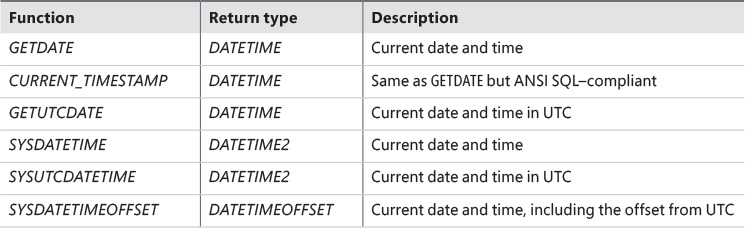

In [4]:
SELECT 
  GETDATE()           AS [GETDATE], 
  CURRENT_TIMESTAMP   AS [CURRENT_TIMESTAMP], 
  GETUTCDATE()        AS [GETUTCDATE], 
  SYSDATETIME()       AS [SYSDATETIME], 
  SYSUTCDATETIME()    AS [SYSUTCDATETIME], 
  SYSDATETIMEOFFSET() AS [SYSDATETIMEOFFSET];

(1 row affected)

Total execution time: 00:00:00.011

GETDATE,CURRENT_TIMESTAMP,GETUTCDATE,SYSDATETIME,SYSUTCDATETIME,SYSDATETIMEOFFSET
2022-08-04 12:31:49.933,2022-08-04 12:31:49.933,2022-08-04 17:31:49.933,2022-08-04 12:31:49.9336924,2022-08-04 17:31:49.9336924,2022-08-04 12:31:49.9336924 -05:00


# CAST, CONVERT, and PARSE Functions with TRY Counterparts

- Used to convert an input value to some type target type, returning a converted value if the conversion succeed and an error if it does not
- Each function has a TRY counterpart, that returns a NULL instead of an error in the case where a conversion fails
- CAST is standard, while CONVERT and PARSE are not
	- PARSE is more expensive than CONVERT so it will not be covered
- It is recommended to use CAST unless style numbers or culture are needed
- Syntax:
	- CAST(value AS datatype)
	- TRY_CAST(value AS datatype)
	- CONVERT (datatype, value [, style_number])
	- TRY_CONVERT (datatype, value [, style_number])
	- PARSE (value AS datatype [USING culture])
	- TRY_PARSE (value AS datatype [USING culture])

In [6]:
-- CAST
SELECT CAST('20160212' AS DATE) AS date;

SELECT CAST(SYSDATETIME() AS DATE) AS sys_date;

SELECT CAST(SYSDATETIME() AS TIME) as sys_date_time;

-- CONVERT
SELECT CONVERT(CHAR(8), CURRENT_TIMESTAMP, 112) AS string_date;

SELECT CONVERT(CHAR(12), CURRENT_TIMESTAMP, 114) AS string_date_time;

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.104

date
2016-02-12


sys_date
2022-08-04


sys_date_time
12:33:24.6150379


string_date
20220804


string_date_time
12:33:24:613


# The DATEADD Function

- Adds a specified number of units of a specified date part to an input date and time value
- Syntax: DATEADD(part, n, value)
- Valid values for part include;
	- YEAR
	- QUARTER
	- MONTH
	- DAYOFYEAR
	- DAY
	- WEEK
	- WEEKDAY
	- HOUR
	- MINUTE
	- SECOND
	- MILLISECOND
	- MICROSECOND
	- NANOSECOND
- The return type for a date and time input is the same as the input type
- If the function is given a string literal as input, the output is DATETIME

In [7]:
SELECT DATEADD(YEAR, 1, '20160212') AS date_time;

SELECT DATEADD(MONTH, 3, '2016-02-01') AS date_time;

SELECT DATEADD(MONTH, -1, CAST('2016-02-1' AS DATE)) AS date;

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.041

date
2017-02-12 00:00:00.000


date
2016-05-01 00:00:00.000


date
2016-01-01


# The DATEDIFF and DATEDIFF_BIG Functions

- Return the difference between two date and time values in terms of a specified date part
- DATEDIFF returns a INT value (4-byte integer), while DATEDIFF_BIG returns a BIGINT value(8-byte integer)
- Syntax:
	- DATEDIFF(part, dt_val1, dt_val2)
	- DATEDIFF_BIG(part, dt_val1, dt_val2)
- Valid values for part are the same for the DATEADD function above

In [8]:
SELECT DATEDIFF(DAY, '2016-01-01', '2016-12-31') AS date_diff;

SELECT DATEDIFF(MONTH, '2016-01-01', '2016-12-31') AS date_diff;

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.013

date_diff
365


date_diff
11


# The DATEPART Function

- Returns an integer representing a requested part of a date and time value
- Syntax: DATEPART(part, dt_val)
- Valid values for part are the same for the DATEADD functions above, but also include:
	- TZoffset
	- ISO_WEEK

In [9]:
SELECT DATEPART(MONTH, '2016-01-01') AS date_part;

SELECT DATEPART(YEAR, '2016-01-01') AS date_part;

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.010

date_part
1


date_part
2016


# The YEAR, MONTH, and DAY Functions

- Abbreviations of the DATEPART function, returning an integer representation of the year, month, and day parts of an input date and time value
- Syntax:
	- YEAR(dt_val)
	- MONTH(dt_val)
	- DAY(dt_val)

In [10]:
SELECT 
  DAY('20160212') AS TheDay, 
  MONTH('20160212') AS TheMonth, 
  YEAR('20160212') AS TheYear;

(1 row affected)

Total execution time: 00:00:00.008

TheDay,TheMonth,TheYear
12,2,2016


# The DATENAME Function

- Returns a character string representing a part of a date and time value
- Similar to DATEPART with the same part input options, returning a name where relevant (if the part requested does not have a name, the function returns a numeric value)
- Syntax: DATENAME(dt_val, part)

In [11]:
SELECT DATENAME(MONTH, '2016-01-01') AS date_name;

SELECT DATENAME(YEAR, '2016-01-01') AS date_name;

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.030

date_name
January


date_name
2016


# THE ISDATE Function

- Accepts a character string as an argument, and returns 1 if it is convertible to a date and time data type, or 0 if it isn't
- Syntax: ISDATE(string)

In [12]:
SELECT ISDATE('20160212') AS is_date;

SELECT ISDATE('20160230') AS is_date;

SELECT ISDATE('TEST') AS is_date;

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.013

is_date
1


is_date
0


is_date
0


# The FROMPARTS Function

- Accepts integer inputs representing parts of a date and time value and constructs a value of the requested type from those parts
- Syntax:
	- DATEFROMPARTS (year, month, day)
	- DATETIME2FROMPARTS (year, month, day, hour, minute, seconds, fractions, precision)
	- DATETIMEFROMPARTS (year, month, day, hour, minute, seconds, milliseconds)
	- DATETIMEOFFSETFROMPARTS (year, month, day, hour, minute, seconds, fractions, hour_offset, minute_offset, precision)
	- SMALLDATETIMEFROMPARTS (year, month, day, hour, minute)
	- TIMEFROMPARTS (hour, minute, seconds, fractions, precision)

In [13]:
SELECT 
  DATEFROMPARTS(2016, 02, 12) AS date_from_parts,
  DATETIME2FROMPARTS(2016, 02, 12, 13, 30, 5, 1, 7) AS date_time_2_from_parts,
  DATETIMEFROMPARTS(2016, 02, 12, 13, 30, 5, 997) AS date_time_from_parts,
  DATETIMEOFFSETFROMPARTS(2016, 02, 12, 13, 30, 5, 1, -8, 0, 7) AS date_time_offset_from_parts,
  SMALLDATETIMEFROMPARTS(2016, 02, 12, 13, 30) AS small_date_time_from_parts, 
  TIMEFROMPARTS(13, 30, 5, 1, 7) AS time_from_parts;

(1 row affected)

Total execution time: 00:00:00.008

date_from_parts,date_time_2_from_parts,date_time_from_parts,date_time_offset_from_parts,small_date_time_from_parts,time_from_parts
2016-02-12,2016-02-12 13:30:05.0000001,2016-02-12 13:30:05.997,2016-02-12 13:30:05.0000001 -08:00,2016-02-12 13:30:00,13:30:05.0000001


# The EOMONTH Function

- Accepts an input date and time value and returns the respective end-of-month date as a DATE typed value
- Supports an optional second argument indicating how many months to add or subtract (negative)
- Syntax: EOMONTH(input [, months_to_add])

In [14]:
USE TSQLV4;

SELECT EOMONTH('2016-01-01') AS eo_month;

SELECT EOMONTH('2016-01-01', 3) AS eo_month;

SELECT TOP 3
    orderid,
    orderdate,
    custid,
    empid
FROM Sales.Orders
WHERE orderdate = EOMONTH(orderdate);

(1 row affected)

(1 row affected)

(3 rows affected)

Total execution time: 00:00:00.068

eo_month
2016-01-31


eo_month
2016-04-30


orderid,orderdate,custid,empid
10269,2014-07-31,89,5
10317,2014-09-30,48,6
10343,2014-10-31,44,4
